<p style="text-align:center">
    <a href="https://skills.network/?utm_medium=Exinfluencer&utm_source=Exinfluencer&utm_content=000026UJ&utm_term=10006555&utm_id=NA-SkillsNetwork-Channel-SkillsNetworkCoursesIBMDeveloperSkillsNetworkML0101ENSkillsNetwork20718538-2022-01-01" target="_blank">
    <img src="https://cf-courses-data.s3.us.cloud-object-storage.appdomain.cloud/assets/logos/SN_web_lightmode.png" width="200" alt="Skills Network Logo"  />
    </a>
</p>

<h1 align="center"><font size="5">Classification with Python</font></h1>


In this notebook we try to practice all the classification algorithms that we have learned in this course.

We load a dataset using Pandas library, and apply the following algorithms, and find the best one for this specific dataset by accuracy evaluation methods.

Let's first load required libraries:


In [87]:
import itertools
import numpy as np
import matplotlib.pyplot as plt
from matplotlib.ticker import NullFormatter
import pandas as pd
import numpy as np
import matplotlib.ticker as ticker
from sklearn import preprocessing
%matplotlib inline

### About dataset


This dataset is about past loans. The **Loan_train.csv** data set includes details of 346 customers whose loan are already paid off or defaulted. It includes following fields:

| Field          | Description                                                                           |
| -------------- | ------------------------------------------------------------------------------------- |
| Loan_status    | Whether a loan is paid off on in collection                                           |
| Principal      | Basic principal loan amount at the                                                    |
| Terms          | Origination terms which can be weekly (7 days), biweekly, and monthly payoff schedule |
| Effective_date | When the loan got originated and took effects                                         |
| Due_date       | Since it’s one-time payoff schedule, each loan has one single due date                |
| Age            | Age of applicant                                                                      |
| Education      | Education of applicant                                                                |
| Gender         | The gender of applicant                                                               |


### Load Data From CSV File


In [89]:
df = pd.read_csv(r"C:\Users\User\Documents\Andrew Ng's ML\loan_train.csv")
df.head()

,Unnamed: 0,Unnamed: 0.1,loan_status,Principal,terms,effective_date,due_date,age,education,Gender
0,0,0,PAIDOFF,1000,30,9/8/2016,10/7/2016,45,High School or Below,male
1,2,2,PAIDOFF,1000,30,9/8/2016,10/7/2016,33,Bechalor,female
2,3,3,PAIDOFF,1000,15,9/8/2016,9/22/2016,27,college,male
3,4,4,PAIDOFF,1000,30,9/9/2016,10/8/2016,28,college,female
4,6,6,PAIDOFF,1000,30,9/9/2016,10/8/2016,29,college,male


In [90]:
df.shape

(346, 10)

### Convert to date time object


In [91]:
df['due_date'] = pd.to_datetime(df['due_date'])
df['effective_date'] = pd.to_datetime(df['effective_date'])
df.head()

,Unnamed: 0,Unnamed: 0.1,loan_status,Principal,terms,effective_date,due_date,age,education,Gender
0,0,0,PAIDOFF,1000,30,2016-09-08,2016-10-07,45,High School or Below,male
1,2,2,PAIDOFF,1000,30,2016-09-08,2016-10-07,33,Bechalor,female
2,3,3,PAIDOFF,1000,15,2016-09-08,2016-09-22,27,college,male
3,4,4,PAIDOFF,1000,30,2016-09-09,2016-10-08,28,college,female
4,6,6,PAIDOFF,1000,30,2016-09-09,2016-10-08,29,college,male


# Data visualization and pre-processing


Let’s see how many of each class is in our data set


In [92]:
df['loan_status'].value_counts()

PAIDOFF       260
COLLECTION     86
Name: loan_status, dtype: int64

260 people have paid off the loan on time while 86 have gone into collection


Let's plot some columns to underestand data better:


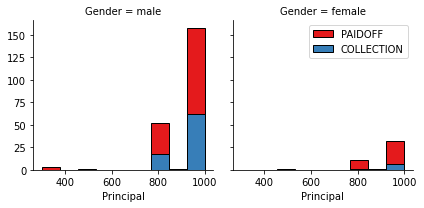

In [93]:
import seaborn as sns

bins = np.linspace(df.Principal.min(), df.Principal.max(), 10)
g = sns.FacetGrid(df, col="Gender", hue="loan_status", palette="Set1", col_wrap=2)
g.map(plt.hist, 'Principal', bins=bins, ec="k")

g.axes[-1].legend()
plt.show()

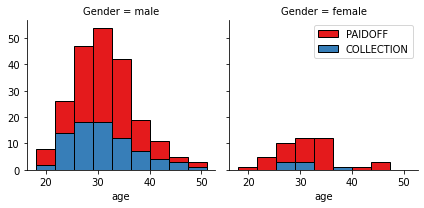

In [94]:
bins = np.linspace(df.age.min(), df.age.max(), 10)
g = sns.FacetGrid(df, col="Gender", hue="loan_status", palette="Set1", col_wrap=2)
g.map(plt.hist, 'age', bins=bins, ec="k")

g.axes[-1].legend()
plt.show()

# Pre-processing:  Feature selection/extraction


### Let's look at the day of the week people get the loan


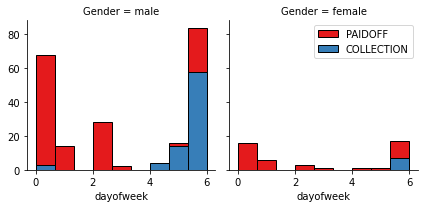

In [95]:
df['dayofweek'] = df['effective_date'].dt.dayofweek
bins = np.linspace(df.dayofweek.min(), df.dayofweek.max(), 10)
g = sns.FacetGrid(df, col="Gender", hue="loan_status", palette="Set1", col_wrap=2)
g.map(plt.hist, 'dayofweek', bins=bins, ec="k")
g.axes[-1].legend()
plt.show()


We see that people who get the loan at the end of the week don't pay it off, so let's use Feature binarization to set a threshold value less than day 4


In [96]:
df['weekend'] = df['dayofweek'].apply(lambda x: 1 if (x>3)  else 0)
df.head()

,Unnamed: 0,Unnamed: 0.1,loan_status,Principal,terms,effective_date,due_date,age,education,Gender,dayofweek,weekend
0,0,0,PAIDOFF,1000,30,2016-09-08,2016-10-07,45,High School or Below,male,3,0
1,2,2,PAIDOFF,1000,30,2016-09-08,2016-10-07,33,Bechalor,female,3,0
2,3,3,PAIDOFF,1000,15,2016-09-08,2016-09-22,27,college,male,3,0
3,4,4,PAIDOFF,1000,30,2016-09-09,2016-10-08,28,college,female,4,1
4,6,6,PAIDOFF,1000,30,2016-09-09,2016-10-08,29,college,male,4,1


## Convert Categorical features to numerical values


Let's look at gender:


In [97]:
df.groupby(['Gender'])['loan_status'].value_counts(normalize=True)

Gender  loan_status
female  PAIDOFF        0.865385
        COLLECTION     0.134615
male    PAIDOFF        0.731293
        COLLECTION     0.268707
Name: loan_status, dtype: float64

86 % of female pay there loans while only 73 % of males pay there loan


Let's convert male to 0 and female to 1:


In [98]:
df['Gender'].replace(to_replace=['male','female'], value=[0,1],inplace=True)
df.head()

,Unnamed: 0,Unnamed: 0.1,loan_status,Principal,terms,effective_date,due_date,age,education,Gender,dayofweek,weekend
0,0,0,PAIDOFF,1000,30,2016-09-08,2016-10-07,45,High School or Below,0,3,0
1,2,2,PAIDOFF,1000,30,2016-09-08,2016-10-07,33,Bechalor,1,3,0
2,3,3,PAIDOFF,1000,15,2016-09-08,2016-09-22,27,college,0,3,0
3,4,4,PAIDOFF,1000,30,2016-09-09,2016-10-08,28,college,1,4,1
4,6,6,PAIDOFF,1000,30,2016-09-09,2016-10-08,29,college,0,4,1


## One Hot Encoding

#### How about education?


In [99]:
df.groupby(['education'])['loan_status'].value_counts(normalize=True)

education             loan_status
Bechalor              PAIDOFF        0.750000
                      COLLECTION     0.250000
High School or Below  PAIDOFF        0.741722
                      COLLECTION     0.258278
Master or Above       COLLECTION     0.500000
                      PAIDOFF        0.500000
college               PAIDOFF        0.765101
                      COLLECTION     0.234899
Name: loan_status, dtype: float64

#### Features before One Hot Encoding


In [100]:
df[['Principal','terms','age','Gender','education']].head()

,Principal,terms,age,Gender,education
0,1000,30,45,0,High School or Below
1,1000,30,33,1,Bechalor
2,1000,15,27,0,college
3,1000,30,28,1,college
4,1000,30,29,0,college


#### Use one hot encoding technique to conver categorical varables to binary variables and append them to the feature Data Frame


In [101]:
Feature = df[['Principal','terms','age','Gender','weekend']]
Feature = pd.concat([Feature,pd.get_dummies(df['education'])], axis=1)
Feature.drop(['Master or Above'], axis = 1,inplace=True)
Feature.head()


,Principal,terms,age,Gender,weekend,Bechalor,High School or Below,college
0,1000,30,45,0,0,0,1,0
1,1000,30,33,1,0,1,0,0
2,1000,15,27,0,0,0,0,1
3,1000,30,28,1,1,0,0,1
4,1000,30,29,0,1,0,0,1


### Feature Selection


Let's define feature sets, X:


In [102]:
X = Feature
X[0:5]

,Principal,terms,age,Gender,weekend,Bechalor,High School or Below,college
0,1000,30,45,0,0,0,1,0
1,1000,30,33,1,0,1,0,0
2,1000,15,27,0,0,0,0,1
3,1000,30,28,1,1,0,0,1
4,1000,30,29,0,1,0,0,1


What are our lables?


In [103]:
y = df['loan_status'].values
y[0:5]

array(['PAIDOFF', 'PAIDOFF', 'PAIDOFF', 'PAIDOFF', 'PAIDOFF'],
      dtype=object)

## Normalize Data


Data Standardization give data zero mean and unit variance (technically should be done after train test split)


In [104]:
X= preprocessing.StandardScaler().fit(X).transform(X)
X[0:5]

array([[ 0.52,  0.92,  2.33, -0.42, -1.21, -0.38,  1.14, -0.87],
       [ 0.52,  0.92,  0.34,  2.38, -1.21,  2.62, -0.88, -0.87],
       [ 0.52, -0.96, -0.65, -0.42, -1.21, -0.38, -0.88,  1.15],
       [ 0.52,  0.92, -0.49,  2.38,  0.83, -0.38, -0.88,  1.15],
       [ 0.52,  0.92, -0.32, -0.42,  0.83, -0.38, -0.88,  1.15]])

# Classification


Now, it is your turn, use the training set to build an accurate model. Then use the test set to report the accuracy of the model
You should use the following algorithm:

*   K Nearest Neighbor(KNN)
*   Decision Tree
*   Support Vector Machine
*   Logistic Regression

\__ Notice:\__

*   You can go above and change the pre-processing, feature selection, feature-extraction, and so on, to make a better model.
*   You should use either scikit-learn, Scipy or Numpy libraries for developing the classification algorithms.
*   You should include the code of the algorithm in the following cells.


# K Nearest Neighbor(KNN)

Notice: You should find the best k to build the model with the best accuracy.\
**warning:** You should not use the **loan_test.csv** for finding the best k, however, you can split your train_loan.csv into train and test to find the best **k**.


In [105]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split( X, y, test_size=0.2, random_state=4)
print ('Train set:', X_train.shape,  y_train.shape)
print ('Test set:', X_test.shape,  y_test.shape)

Train set: (276, 8) (276,)
Test set: (70, 8) (70,)


In [106]:
from sklearn.neighbors import KNeighborsClassifier

In [108]:
from sklearn import metrics

In [110]:
k = 3
#We fit the model:
kNN_model = KNeighborsClassifier(n_neighbors=k).fit(X_train, y_train)
kNN_model
y_pred = kNN_model.predict( X_test )

#Find the max value
accuracies = {}
k_max = 1
acc_max = 0
for k in range(1, 10):
    kNN_model = KNeighborsClassifier(n_neighbors=k).fit(X_train, y_train)
    y_pred = kNN_model.predict( X_test )
    accuracies[k] = accuracy_score(y_test, y_pred)
    print(k, accuracies[k])

1 0.6714285714285714
2 0.6571428571428571
3 0.7142857142857143
4 0.6857142857142857
5 0.7571428571428571
6 0.7142857142857143
7 0.7857142857142857
8 0.7571428571428571
9 0.7571428571428571


In [113]:
from sklearn.metrics import f1_score
from sklearn.metrics import jaccard_score
from sklearn import metrics

print("We take k = 7, as it has the highest accuracy")
knn_model = KNeighborsClassifier(n_neighbors = 7).fit(X_train, y_train)

print("Train set Accuracy (Jaccard): ", metrics.accuracy_score(y_train, knn_model.predict(X_train)))
print("Test set Accuracy (Jaccard): ", metrics.accuracy_score(y_test, knn_model.predict(X_test)))

print("Train set Accuracy (F1): ", f1_score(y_train, knn_model.predict(X_train), average='weighted'))
print("Test set Accuracy (F1): ", f1_score(y_test, knn_model.predict(X_test), average='weighted'))

We take k = 7, as it has the highest accuracy
Train set Accuracy (Jaccard):  0.8079710144927537
Test set Accuracy (Jaccard):  0.7857142857142857
Train set Accuracy (F1):  0.8000194668761034
Test set Accuracy (F1):  0.7766540244416351


# Decision Tree


In [114]:
from sklearn.tree import DecisionTreeClassifier

In [115]:
for d in range(1,10):
    dt = DecisionTreeClassifier(criterion = 'entropy', max_depth = d).fit(X_train, y_train)
    y_pred = dt.predict(X_test)
    print(d, accuracy_score(y_test, y_pred))

1 0.7857142857142857
2 0.7857142857142857
3 0.6142857142857143
4 0.6142857142857143
5 0.6428571428571429
6 0.7714285714285715
7 0.7571428571428571
8 0.7571428571428571
9 0.6571428571428571


In [116]:
print("d equals 1 or 2 has the highest accuracy. lets take d=2")
dt = DecisionTreeClassifier(criterion="entropy", max_depth=2).fit(X_train, y_train)

print("Train set Accuracy (Jaccard): ", metrics.accuracy_score(y_train, dt.predict(X_train)))
print("Test set Accuracy (Jaccard): ", metrics.accuracy_score(y_test, dt.predict(X_test)))

print("Train set Accuracy (F1): ", f1_score(y_train, dt.predict(X_train), average='weighted'))
print("Test set Accuracy (F1): ", f1_score(y_test, dt.predict(X_test), average='weighted'))

d equals 1 or 2 has the highest accuracy. lets take d=2
Train set Accuracy (Jaccard):  0.7427536231884058
Test set Accuracy (Jaccard):  0.7857142857142857
Train set Accuracy (F1):  0.6331163939859591
Test set Accuracy (F1):  0.6914285714285714


# Support Vector Machine


In [117]:
from sklearn.metrics import classification_report,confusion_matrix
from sklearn import svm

In [118]:
for k in ('linear', 'poly', 'rbf','sigmoid'):
    svm_model = svm.SVC( kernel = k).fit(X_train,y_train)
    svm_yhat = svm_model.predict(X_test)
    print("For kernel: {}, the f1 score is: {}".format(k,f1_score(y_test,svm_yhat, average='weighted')))

For kernel: linear, the f1 score is: 0.6914285714285714
For kernel: poly, the f1 score is: 0.7064793130366899
For kernel: rbf, the f1 score is: 0.7275882012724117
For kernel: sigmoid, the f1 score is: 0.6892857142857144


In [119]:
print("choosing our kernel as 'rbf' produced the highest accuracy. Hence, we train our model using rbf")
svm_model = svm.SVC( kernel = 'rbf').fit(X_train,y_train)


print("Train set Accuracy (Jaccard): ", metrics.accuracy_score(y_train, svm_model.predict(X_train)))
print("Test set Accuracy (Jaccard): ", metrics.accuracy_score(y_test, svm_model.predict(X_test)))

print("Train set Accuracy (F1): ", f1_score(y_train, svm_model.predict(X_train), average='weighted'))
print("Test set Accuracy (F1): ", f1_score(y_test, svm_model.predict(X_test), average='weighted'))

choosing our kernel as 'rbf' produced the highest accuracy. Hence, we train our model using rbf
Train set Accuracy (Jaccard):  0.782608695652174
Test set Accuracy (Jaccard):  0.7428571428571429
Train set Accuracy (F1):  0.7682165861513688
Test set Accuracy (F1):  0.7275882012724117


In [120]:
def plot_confusion_matrix(cm, classes,
                          normalize=False,
                          title='Confusion matrix',
                          cmap=plt.cm.Blues):
    """
    This function prints and plots the confusion matrix.
    Normalization can be applied by setting `normalize=True`.
    """
    if normalize:
        cm = cm.astype('float') / cm.sum(axis=1)[:, np.newaxis]
        print("Normalized confusion matrix")
    else:
        print('Confusion matrix, without normalization')

    print(cm)

    plt.imshow(cm, interpolation='nearest', cmap=cmap)
    plt.title(title)
    plt.colorbar()
    tick_marks = np.arange(len(classes))
    plt.xticks(tick_marks, classes, rotation=45)
    plt.yticks(tick_marks, classes)

    fmt = '.2f' if normalize else 'd'
    thresh = cm.max() / 2.
    for i, j in itertools.product(range(cm.shape[0]), range(cm.shape[1])):
        plt.text(j, i, format(cm[i, j], fmt),
                 horizontalalignment="center",
                 color="white" if cm[i, j] > thresh else "black")

    plt.tight_layout()
    plt.ylabel('True label')
    plt.xlabel('Predicted label')

              precision    recall  f1-score   support

  COLLECTION       0.36      0.27      0.31        15
     PAIDOFF       0.81      0.87      0.84        55

    accuracy                           0.74        70
   macro avg       0.59      0.57      0.57        70
weighted avg       0.72      0.74      0.73        70

Confusion matrix, without normalization
[[48  7]
 [11  4]]


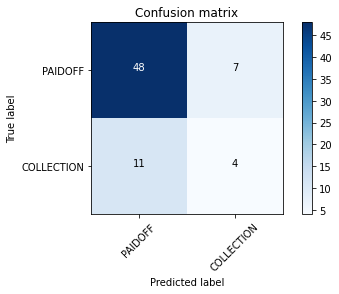

In [124]:
cnf_matrix = confusion_matrix(y_test,svm_model.predict(X_test), labels=["PAIDOFF","COLLECTION"])
np.set_printoptions(precision=2)

print (classification_report(y_test,svm_model.predict(X_test)))

# Plot non-normalized confusion matrix
plt.figure()
plot_confusion_matrix(cnf_matrix, classes=['PAIDOFF','COLLECTION'],normalize= False,  title='Confusion matrix')

# Logistic Regression


In [125]:
from sklearn.linear_model import LogisticRegression 
from sklearn.metrics import log_loss

In [126]:
for k in ('lbfgs', 'saga', 'liblinear', 'newton-cg', 'sag'):
    lr_model = LogisticRegression(C = 0.01, solver = k).fit(X_train, y_train)
    lr_yhat = lr_model.predict(X_test)
    y_prob = lr_model.predict_proba(X_test)
    print('When Solver is {}, logloss is : {}'.format(k, log_loss(y_test, y_prob)))

When Solver is lbfgs, logloss is : 0.4920179847937498
When Solver is saga, logloss is : 0.4920183281222884
When Solver is liblinear, logloss is : 0.5772287609479654
When Solver is newton-cg, logloss is : 0.4920178014679269
When Solver is sag, logloss is : 0.4920156952979839


In [127]:
print(" 'liblinear' produced the highest accuracy, hence, we would try our model using 'liblinear' ")
k = 'liblinear'
lr_model = LogisticRegression(C = 0.01, solver = k).fit(X_train, y_train)

print("Train set Accuracy (Jaccard): ", metrics.accuracy_score(y_train, lr_model.predict(X_train)))
print("Test set Accuracy (Jaccard): ", metrics.accuracy_score(y_test, lr_model.predict(X_test)))

print("Train set Accuracy (F1): ", f1_score(y_train, lr_model.predict(X_train), average='weighted'))
print("Test set Accuracy (F1): ", f1_score(y_test, lr_model.predict(X_test), average='weighted'))

 'liblinear' produced the highest accuracy, hence, we would try our model using 'liblinear' 
Train set Accuracy (Jaccard):  0.7572463768115942
Test set Accuracy (Jaccard):  0.6857142857142857
Train set Accuracy (F1):  0.7341146337750953
Test set Accuracy (F1):  0.6670522459996144


In [128]:
yhat_prob = lr_model.predict_proba(X_test)
yhat_prob

array([[0.5 , 0.5 ],
       [0.45, 0.55],
       [0.31, 0.69],
       [0.34, 0.66],
       [0.32, 0.68],
       [0.32, 0.68],
       [0.49, 0.51],
       [0.48, 0.52],
       [0.34, 0.66],
       [0.49, 0.51],
       [0.34, 0.66],
       [0.5 , 0.5 ],
       [0.25, 0.75],
       [0.34, 0.66],
       [0.44, 0.56],
       [0.26, 0.74],
       [0.52, 0.48],
       [0.3 , 0.7 ],
       [0.5 , 0.5 ],
       [0.32, 0.68],
       [0.44, 0.56],
       [0.49, 0.51],
       [0.51, 0.49],
       [0.47, 0.53],
       [0.41, 0.59],
       [0.51, 0.49],
       [0.51, 0.49],
       [0.37, 0.63],
       [0.5 , 0.5 ],
       [0.25, 0.75],
       [0.47, 0.53],
       [0.46, 0.54],
       [0.46, 0.54],
       [0.48, 0.52],
       [0.39, 0.61],
       [0.46, 0.54],
       [0.5 , 0.5 ],
       [0.29, 0.71],
       [0.46, 0.54],
       [0.45, 0.55],
       [0.51, 0.49],
       [0.32, 0.68],
       [0.45, 0.55],
       [0.51, 0.49],
       [0.31, 0.69],
       [0.5 , 0.5 ],
       [0.47, 0.53],
       [0.5 ,

# Model Evaluation using Test set


In [129]:
from sklearn.metrics import jaccard_score
from sklearn.metrics import f1_score
from sklearn.metrics import log_loss


### Load Test set for evaluation


In [130]:
test_df = pd.read_csv(r"C:\Users\User\Documents\Andrew Ng's ML\loan_test.csv")
test_df.head()

,Unnamed: 0,Unnamed: 0.1,loan_status,Principal,terms,effective_date,due_date,age,education,Gender
0,1,1,PAIDOFF,1000,30,9/8/2016,10/7/2016,50,Bechalor,female
1,5,5,PAIDOFF,300,7,9/9/2016,9/15/2016,35,Master or Above,male
2,21,21,PAIDOFF,1000,30,9/10/2016,10/9/2016,43,High School or Below,female
3,24,24,PAIDOFF,1000,30,9/10/2016,10/9/2016,26,college,male
4,35,35,PAIDOFF,800,15,9/11/2016,9/25/2016,29,Bechalor,male


In [131]:
test_df['due_date'] = pd.to_datetime(test_df['due_date'])
test_df['effective_date'] = pd.to_datetime(test_df['effective_date'])
test_df['dayofweek'] = test_df['effective_date'].dt.dayofweek

test_df['weekend'] = test_df['dayofweek'].apply(lambda x: 1 if (x>3)  else 0)
test_df['Gender'].replace(to_replace=['male','female'], value=[0,1],inplace=True)

Feature1 = test_df[['Principal','terms','age','Gender','weekend']]
Feature1 = pd.concat([Feature1,pd.get_dummies(test_df['education'])], axis=1)
Feature1.drop(['Master or Above'], axis = 1,inplace=True)


x_loan_test = Feature1
x_loan_test = preprocessing.StandardScaler().fit(x_loan_test).transform(x_loan_test)

y_loan_test = test_df['loan_status'].values

In [132]:
Feature1.head()

,Principal,terms,age,Gender,weekend,Bechalor,High School or Below,college
0,1000,30,50,1,0,1,0,0
1,300,7,35,0,1,0,0,0
2,1000,30,43,1,1,0,1,0
3,1000,30,26,0,1,0,0,1
4,800,15,29,0,1,1,0,0


In [134]:
#jaccard list:
knn_pred = kNN_model.predict(x_loan_test)
j1 = accuracy_score(y_loan_test, knn_pred)

dt_pred = dt.predict(x_loan_test)
j2 = accuracy_score(y_loan_test, dt_pred)

svm_pred = svm_model.predict(x_loan_test)
j3 = accuracy_score(y_loan_test, svm_pred)

lr_pred = lr_model.predict(x_loan_test)
j4 = accuracy_score(y_loan_test, lr_pred)

jaccard = [j1, j2, j3, j4]
jaccard

[0.7037037037037037,
 0.7407407407407407,
 0.7962962962962963,
 0.7407407407407407]

In [136]:
knn_pred = kNN_model.predict(x_loan_test)
f1 = f1_score(y_loan_test, knn_pred, average='weighted')

dt_pred = dt.predict(x_loan_test)
f2 = f1_score(y_loan_test, dt_pred, average='weighted')


svm_pred = svm_model.predict(x_loan_test)
f3 = f1_score(y_loan_test, svm_pred, average='weighted')

lr_pred = lr_model.predict(x_loan_test)
f4 = f1_score(y_loan_test, lr_pred, average='weighted')

f1s = [f1, f2, f3, f4]
f1s

[0.6736355806123249,
 0.6304176516942475,
 0.7583503077293734,
 0.6604267310789049]

In [137]:
from sklearn.metrics import log_loss

lr_pred = lr_model.predict_proba(x_loan_test)
aux = log_loss(y_loan_test, lr_pred)

log_loss = ['NA','NA','NA', aux]
log_loss

['NA', 'NA', 'NA', 0.5672153379912981]

In [138]:
index   = ["KNN", "Decision Tree", "SVM", "Logistic Regression"]
colunms = ["Jaccard", "F1-score", "LogLoss"]

data = [jaccard, f1s, log_loss]
data = np.array(data).T

df = pd.DataFrame(data, index=index, columns=colunms)
df

,Jaccard,F1-score,LogLoss
KNN,0.7037037037037037,0.6736355806123249,NA
Decision Tree,0.7407407407407407,0.6304176516942475,NA
SVM,0.7962962962962963,0.7583503077293734,NA
Logistic Regression,0.7407407407407407,0.6604267310789049,0.5672153379912981
